In [45]:
import pandas as pd


In [46]:
df=pd.read_csv("Mall_Customers.csv")

In [47]:
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [48]:
df.tail(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83


In [49]:
df.shape

(200, 5)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [51]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [52]:
df.duplicated().sum()

0

In [53]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# K-Mean Clustering

In [68]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [73]:
x=df[['Annual Income (k$)',
       'Spending Score (1-100)']]

In [80]:
from sklearn.cluster import KMeans

In [81]:
k_mean=KMeans()

In [82]:
k_mean.fit_predict(x)

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 5, 5,
       0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 4, 4, 5, 5, 5, 5,
       5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 6, 1, 4, 1, 6, 1, 6, 1,
       4, 1, 6, 1, 6, 1, 6, 1, 6, 1, 4, 1, 6, 1, 4, 1, 6, 1, 6, 1, 6, 1,
       6, 1, 6, 1, 6, 1, 4, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1,
       6, 1, 6, 1, 2, 1, 2, 1, 2, 1, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7,
       2, 7])

In [83]:
k_mean.inertia_

25349.951971798004

# Elbow Method To Find optimal number of Clusters

In [88]:
wcss=[]
for i in range(2,11):
    k_mean=KMeans(n_clusters=i)
    k_mean.fit(x)
    wcss.append(k_mean.inertia_)
      

In [92]:
wcss

[182440.30762987016,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37271.88623658948,
 30259.657207285458,
 25012.917069885472,
 21862.09267218289,
 19636.75396489815]

In [93]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'WCSS')

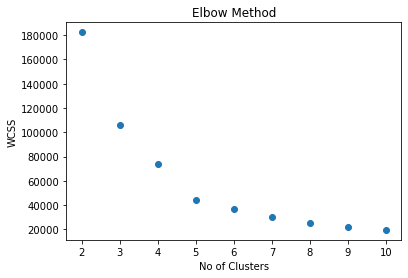

In [96]:
plt.scatter(range(2,11),wcss)

plt.title("Elbow Method")
plt.xlabel('No of Clusters')
plt.ylabel("WCSS")

Optimum number of Clusters will be 5,because after 5 it is decreaing countinously

# Model Training 

In [101]:
k_mean=KMeans(n_clusters=5)

y_mean=k_mean.fit_predict(x)
y_mean

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [102]:
x.iloc[y_mean==0,0]

1     15
3     16
5     17
7     18
9     19
11    19
13    20
15    20
17    21
19    23
21    24
23    25
25    28
27    28
29    29
31    30
33    33
35    33
37    34
39    37
41    38
45    39
Name: Annual Income (k$), dtype: int64

In [111]:
len(x.iloc[y_mean==0,1])

22

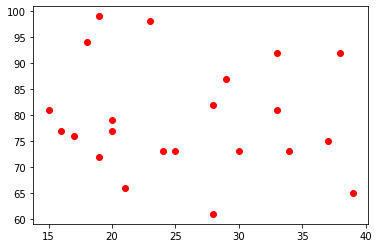

In [110]:
plt.scatter(x.iloc[y_mean==0,0],x.iloc[y_mean==0,1],c='r',label='Cluster-1')


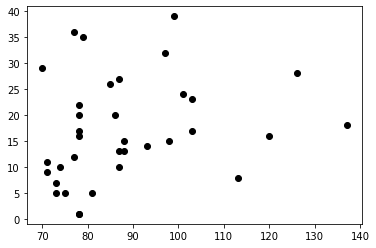

In [116]:
plt.scatter(x.iloc[y_mean==1,0],x.iloc[y_mean==1,1],c='black',label='Cluster-2')

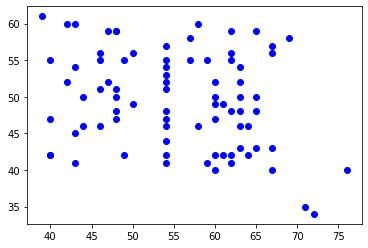

In [118]:
plt.scatter(x.iloc[y_mean==2,0],x.iloc[y_mean==2,1],c='b',label='Cluster-3')

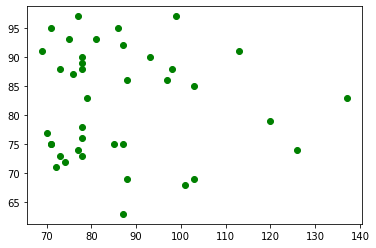

In [119]:
plt.scatter(x.iloc[y_mean==3,0],x.iloc[y_mean==3,1],c='g',label='Cluster-4')

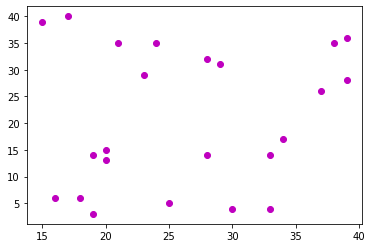

In [124]:
plt.scatter(x.iloc[y_mean==4,0],x.iloc[y_mean==4,1],c='m',label='Cluster-5')

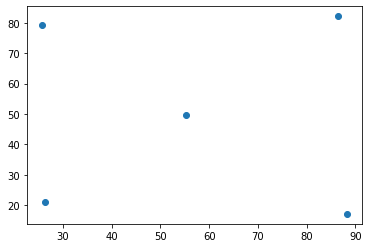

In [146]:
plt.scatter(k_mean.cluster_centers_[:,0],k_mean.cluster_centers_[:,1])

In [147]:
k_mean.cluster_centers_[:,0]

array([25.72727273, 88.2       , 55.2962963 , 86.53846154, 26.30434783])

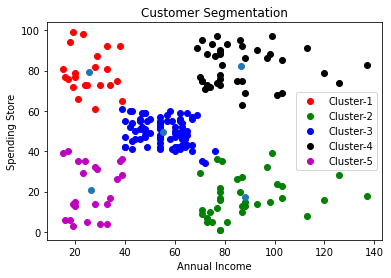

In [148]:
plt.scatter(x.iloc[y_mean==0,0],x.iloc[y_mean==0,1],c='r',label='Cluster-1')
plt.scatter(x.iloc[y_mean==1,0],x.iloc[y_mean==1,1],c='g',label='Cluster-2')
plt.scatter(x.iloc[y_mean==2,0],x.iloc[y_mean==2,1],c='b',label='Cluster-3')
plt.scatter(x.iloc[y_mean==3,0],x.iloc[y_mean==3,1],c='black',label='Cluster-4')
plt.scatter(x.iloc[y_mean==4,0],x.iloc[y_mean==4,1],c='m',label='Cluster-5');

plt.xlabel("Annual Income")
plt.ylabel("Spending Store")
plt.title("Customer Segmentation")
plt.scatter(k_mean.cluster_centers_[:,0],k_mean.cluster_centers_[:,1])

plt.legend()


In [144]:
k_mean.cluster_centers_

array([[25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])